# Reduction of Order Modeling with Proper Orthogonal Decomposition

<a id="table"></a>

## Table of contents
- [High Resolution Simulation](#HR)
- [Snapshots](#)
- [Basis](#)
- [Time improvement](#)
- [Error](#)

- Modify program
- Capture snapshots
- Do clustering
- Do POD
- Select basis accoding to energy value
- Run reduced model
- Compare HOR and ROM results
- Compare Speed of solution


In [49]:
%matplotlib inline
from time import process_time
from scipy import linalg
from matplotlib import pyplot as plt

<a id="HR"></a>

## [High Resolution Model](#table)

The reservoir model is   <a href = http://nbviewer.jupyter.org/github/JaimeLeal/projects/blob/master/Simulator_Two_Phase_Flow.ipynb?flush_cache=true target=_blank>  (this is Example \#2 in the "Two Phase Flow" Notebook)</a>

In [42]:
# Load the reservoir model 
exec(open(".\\scripts\\reservoir_model_01.py").read())
# Run the model and measure the time

# Initialize Fully Implicit Solver
FIM = ImplicitTwoPhase(
    grid, rock, fluid, wells, source, p_init, sw_init, boundary, gravity=True)

# Run simulation
t = process_time()
results, well_solution, sch, info = FIM.solve(sch, max_iter= 10, tol = 1E-6, ATS = False)

elapsed_time = process_time() - t
print('Time running simulation = {:.3f} seconds.'.format(elapsed_time))

Time running simulation = 24.945 seconds.


In [201]:
# Singular value decomposition
U,S,V = linalg.svd(results['p_oil'][:,:])

In [202]:
cumulative_energy = np.array(S**2).cumsum()
cumulative_energy = cumulative_energy/np.array(S**2).sum() * 100

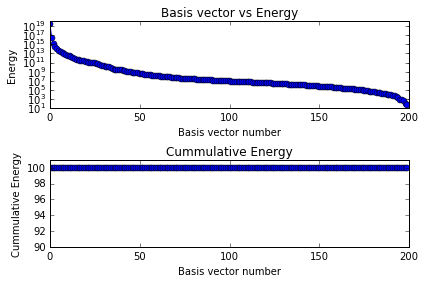

In [203]:
fig = plt.figure()

# Energy subplot
ax1 = fig.add_subplot(2,1,1)
line = ax1.plot(S**2, "o-",linewidth=1)
ax1.set_yscale("log")
plt.title("Basis vector vs Energy")
plt.xlabel("Basis vector number")
plt.ylabel("Energy");
plt.axis([0, None, None, None])

# Cumulative energy subplot
ax2 = fig.add_subplot(2,1,2)
line = ax2.plot(cumulative_energy, "o-",linewidth=1)
ax2.axis([0, None, 90, 101])
plt.title("Cummulative Energy")
plt.xlabel("Basis vector number")
plt.ylabel("Cummulative Energy");

plt.tight_layout()

In [204]:
cumulative_energy[:6]

array([ 99.92653953,  99.99487345,  99.9987476 ,  99.99946715,
        99.99971042,  99.99981011])

C:\Users\Jaime\Anaconda3\lib\site-packages\matplotlib\figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


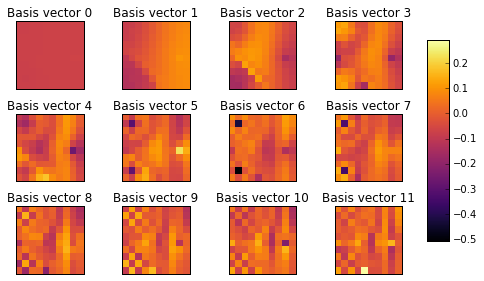

In [205]:
nrows = 3
ncols = 4
layer_num = 12

cell_values = U[0:100,:layer_num]

fig, axes = plt.subplots(nrows=int(nrows), ncols=int(ncols))
colormap = "inferno"
vmin = cell_values.min()
vmax = cell_values.max()
title = "Bases"

for layer in range(0, layer_num):
    Z = cell_values[:, layer]
    Z = Z.reshape([grid.dim[0], grid.dim[1]], order='F')
    ax = axes.flat[layer]
    im = ax.pcolor(Z, cmap=colormap, vmin=vmin, vmax=vmax)
    ax.set_title("Basis vector {}".format(layer))
    # Limits for the axes
    ax.set_ylim([0, grid.dim[0]])
    ax.set_xlim([0, grid.dim[1]])
    # Erase the ticks
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_aspect('equal', adjustable='box-forced')
    ax.invert_yaxis()

    # Hide the empty axes
    for i in range(int(layer_num), int(ncols * nrows)):
        axes.flat[i].axis('off')
    # Color bar
    cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    #plt.suptitle(title)
    plt.tight_layout()

Now, we will apply the proper orthogonal decomposition technique to the reservoir simulator to speed up the simulation. 


C:\Users\Jaime\Anaconda3\lib\site-packages\matplotlib\figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


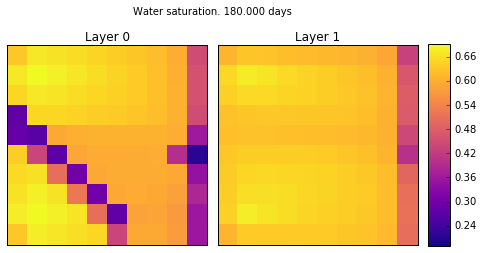

In [170]:
p_oil = results['p_oil'][:,:]/u.psi
sw = results['sw'][:,:]

acum_sum = np.cumsum(sch.timesteps) / u.day
acum_sum = np.hstack((0, acum_sum))

for k in np.arange(0, acum_sum.size, 10):
    plotCellValues2D(grid, p_oil[:, k], 'inferno', np.min(p_oil), np.max(p_oil),
                     title='Oil pressure. {:.3f} days'.format(acum_sum[k]), 
                     filename='{}\\2ph_ex1_po_{}'.format(imgpath,k))

for k in np.arange(0, acum_sum.size, 10):
    plotCellValues2D(grid, sw[:, k], 'plasma', np.min(sw), np.max(sw),
                     title='Water saturation. {:.3f} days'.format(acum_sum[k]), 
                     filename='{}\\2ph_ex1_sw_{}'.format(imgpath,k))

In [172]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Using the style sheet found here  Lorena Barba /* https://github.com/barbagroup/CFDPython/blob/master/styles/custom.css */